<a href="https://colab.research.google.com/github/DesiPilla/DSPS_dPilla/blob/master/HW13/gradientDescentDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# gradient descent demo for 2019 DSPS

In [0]:
import pylab as pl
import numpy as np
%pylab inline
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")


Populating the interactive namespace from numpy and matplotlib


In [0]:
def line (m, b, x) :
    '''makes a line with parameters slope:a, intercept:b '''
    return m * x + b

In [0]:
# creting a line
x = np.arange(3, 19, 0.1)
y = 21 * x + 10

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


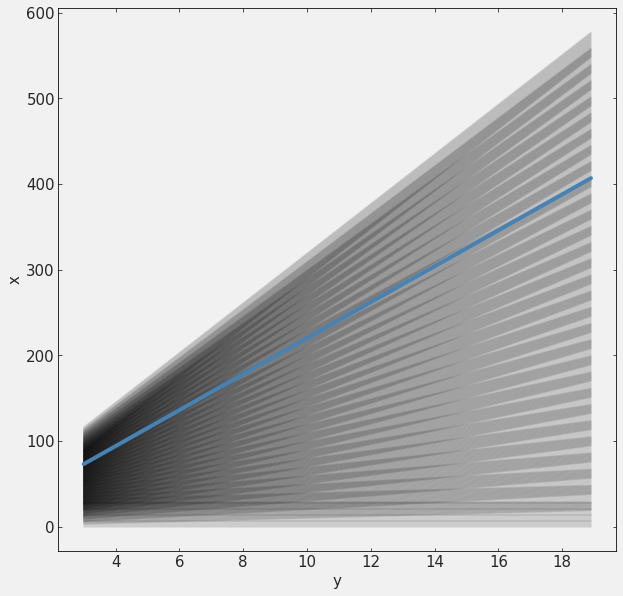

In [0]:
def loss(m, b, x, y):
    ''' L2 loss function 
    m: slope
    b: intercept
    x: data (numpy array)
    y: target (numpy array)
    ax: axis object for plot
    '''    
    return ((y - line(m, b, x))**2).sum() / x.shape[0]

res = np.zeros((30,30))
pl.figure(figsize=(10,10))
for i, m in enumerate(range(0, 30, 1)):
    for j, b in enumerate(range(0, 30, 1)):
        res[i,j] = loss(m, b, x, y)
        pl.plot(x,line(m, b, x), 'k', alpha=.1)
pl.plot(x, y, 'SteelBlue', lw=4)
pl.xlabel("y")
pl.ylabel("x");

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


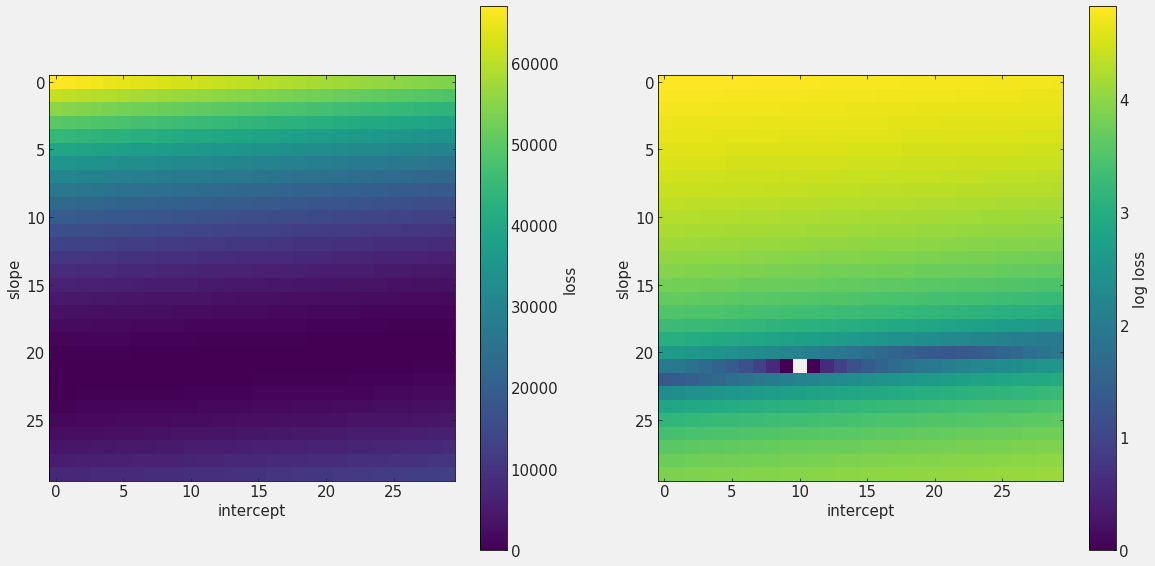

In [0]:
fig = pl.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
pl.imshow(res)
pl.colorbar(label="loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");

ax2 = fig.add_subplot(122)
pl.imshow(np.log10(res))
pl.colorbar(label="log loss")
#pl.axis('off')
pl.xlabel("intercept")
pl.ylabel("slope");

In [0]:
# create the gradient descent

def gradDesc(m, b, x, y, alpha, ax=None):
    N = len(x)
    #partial derivative: 
    f_m, f_b = (-2*x*(y - (m*x + b))).sum(), (-2*(y - (m*x + b))).sum()

    # We subtract because the derivatives point in direction of steepest ascent
    m -= f_m / float(N) * alpha
    b -= f_b / float(N) * alpha
    #print (f_m, f_b)
    if not ax is None:
      ax.plot(m, b, 'ko', alpha=0.2)

    return m, b


In [0]:
#initial setup
m = 11
b = 11

while loss(m, b, x, y) > 1:
    m, b = gradDesc(m, b, x, y, 0.0005)

print('The final learned parameters are\nm:  %.2f\nb:  %.2f' % (m, b))

The final learned parameters are
m:  20.81
b:  11.75


<span style="color:red">**-2 pts: not print loss for each iteration**</span>